<a href="https://colab.research.google.com/github/ariefwcks303/MachineLearningFromScratch/blob/main/Studi_Kasus_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load Data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from yellowbrick.cluster import  KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [5]:
def read(path):
    data = pd.read_csv(path)
    return data

In [6]:
path = '/content/drive/MyDrive/3. Dicoding Platform/2. Microsoft Elevate Training Center/4. Belajar Machine Learning untuk Pemula/Dataset/Mall_Customers.csv'
df = read(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- CustomerID: Ini berisi ID unik untuk setiap pelanggan, bertipe data int64.
- Gender: Ini menunjukkan jenis kelamin pelanggan, bertipe data object (kategori).
- Age: Ini menampilkan usia pelanggan dalam tahun, bertipe data int64.
- Annual Income (k$): Ini berisi pendapatan tahunan pelanggan dalam ribuan dolar, bertipe data int64.
- Spending Score (1-100): Ini menunjukkan skor pengeluaran pelanggan, mulai dari 1 hingga 100, bertipe data int64.

In [9]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Berdasarkan hasil statistik deskriptif yang ditampilkan oleh df.describe(), kita dapat melihat beberapa informasi penting mengenai kolom-kolom numerik dalam dataset.

1. CustomerID
  - Ini terdiri dari 200 data unik dengan nilai rata-rata 100.5.
  - ID pelanggan bervariasi dari 1 hingga 200.

2. Age (Usia)
  - Usia pelanggan berkisar antara 18 hingga 70 tahun dengan rata-rata 38.85 tahun.
  - Sebagian besar pelanggan berada pada rentang usia 28.75 hingga 49 tahun (kuartil ke-1 hingga ke-3).

3. Annual Income (k$) (Pendapatan Tahunan)
  - Pendapatan tahunan pelanggan bervariasi antara 15 hingga 137 ribu dolar dengan rata-rata 60.56 ribu dolar.
  - Sebagian besar pelanggan memiliki pendapatan tahunan antara 41.5 hingga 78 ribu dolar.

4. Spending Score (1–100) (Skor Pengeluaran)
  - Skor pengeluaran pelanggan bervariasi dari 1 hingga 99 dengan rata-rata skor pengeluaran sebesar 50.2.
  - Sebagian besar pelanggan memiliki skor pengeluaran antara 34.75 hingga 73.

Statistik ini memberikan gambaran awal tentang distribusi dan variasi data pada dataset, yang sangat penting untuk analisis lebih lanjut, terutama dalam mengidentifikasi cluster pelanggan berdasarkan karakteristik, seperti usia, pendapatan, serta perilaku belanja.



##Exploratory Data Analysis

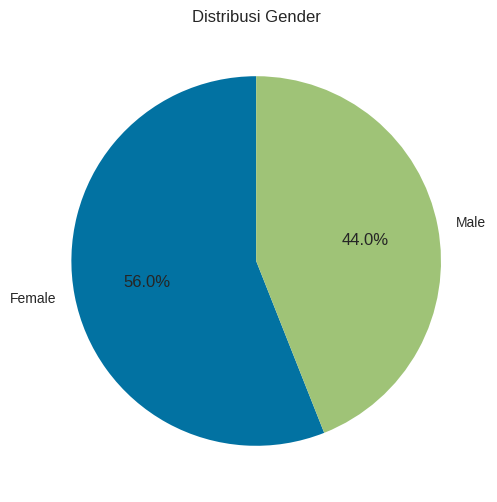

In [10]:
# Menghitung distribusi gender dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(6, 6))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Gender')
plt.show()

Dari pie chart yang ditampilkan, kita dapat ketahui bahwa persentase perempuan lebih besar dibandingkan laki-laki dengan proporsi sebesar 56% untuk perempuan dan 44% untuk laki-laki.

Untuk menganalisis distribusi usia pelanggan, kita mengelompokkan usia ke dalam beberapa kategori dan menghitung jumlah pelanggan pada setiap kategori. Usia dibagi menjadi lima kategori: 18–25, 26–35, 36–45, 46–55, dan 55 ke atas. Setelah menghitung jumlah pelanggan pada setiap kategori, data tersebut digunakan untuk membuat diagram batang (bar chart) yang menunjukkan distribusi usia pelanggan.

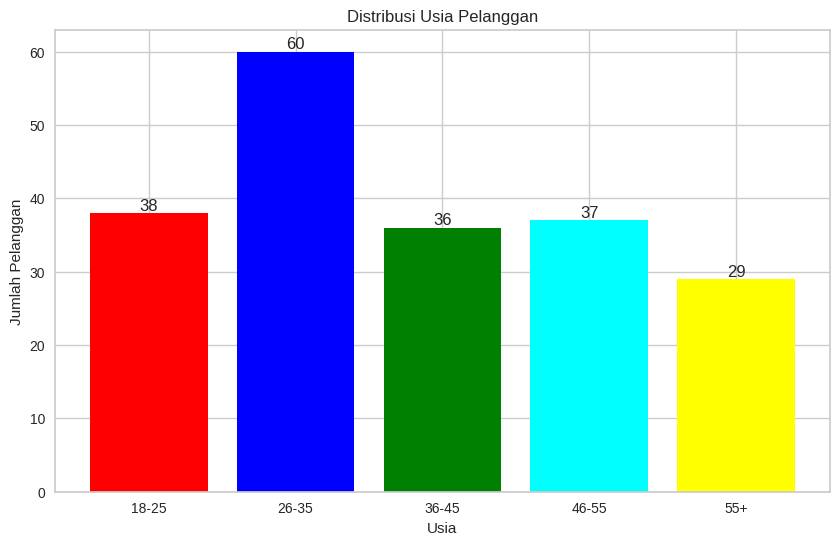

In [13]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age_u25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_u35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_u45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_u55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55up = df.Age[df.Age >= 56]

x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age_u25), len(age_u35), len(age_u45), len(age_u55), len(age_55up)]


plt.figure(figsize=(10, 6))
plt.bar(x, y, color=['red', 'blue', 'green', 'cyan', 'yellow'])
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')



for i in range(len(x)):
    plt.text(i, y[i], str(y[i]), ha='center', va='bottom')

plt.show()


lanjutkan dengan menganalisa distribusi pendapatan

Untuk menganalisis distribusi pendapatan tahunan pelanggan, kita mengelompokkan pendapatan ke dalam beberapa kategori dan menghitung jumlah pelanggan pada setiap kategori. Pendapatan tahunan dikelompokkan ke dalam lima rentang.

1. $0–30,000

2. $30,001–60,000

3. $60,001–90,000

4. $90,001–120,000

5. $120,001–150,000

In [ ]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori




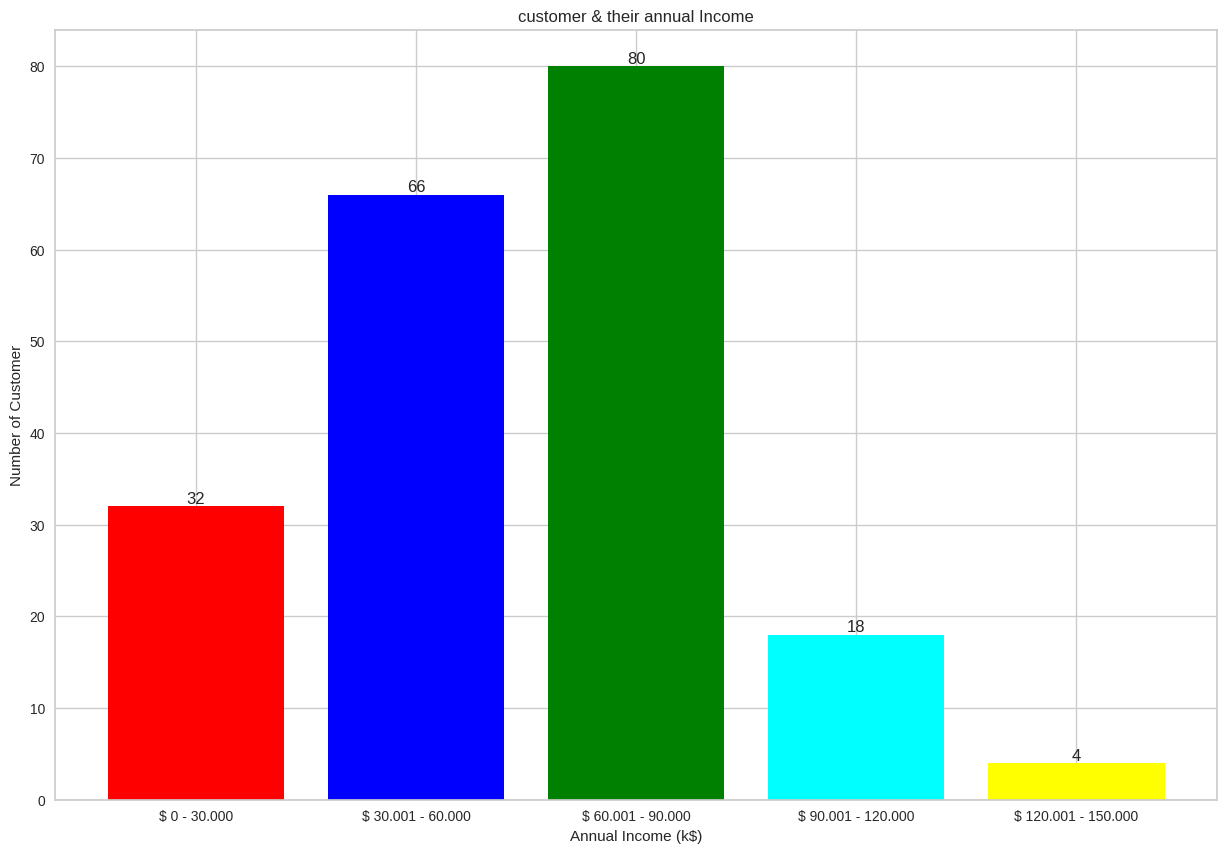

In [18]:
ann_inc_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ann_inc_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ann_inc_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ann_inc_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ann_inc_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]


# Menyusun data untuk plotting
x = ["$ 0 - 30.000", "$ 30.001 - 60.000", "$ 60.001 - 90.000", "$ 90.001 - 120.000", "$ 120.001 - 150.000"]
y = [len(ann_inc_30), len(ann_inc_60), len(ann_inc_90), len(ann_inc_120), len(ann_inc_150)]

#plotting
plt.figure(figsize=(15,10))
plt.bar(x, y, color=['red', 'blue', 'green', 'cyan', 'yellow'])
plt.title('customer & their annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customer')

for i in range(len(x)):
    plt.text(i, y[i], str(y[i]), ha='center', va='bottom')

plt.show()


Hasil visualisasi menunjukkan distribusi pendapatan tahunan pelanggan sebagai berikut.


1. 0–30,000: ada 32 pelanggan dalam rentang pendapatan ini.

2. $30,001–60,000: kategori ini memiliki jumlah pelanggan terbanyak, yaitu 66.

3. $60,001–90,000: ada 80 pelanggan dalam rentang pendapatan ini dan menjadikannya kategori dengan jumlah pelanggan terbesar.

4. $90,001–120,000: rentang ini memiliki 18 pelanggan.

5. $120,001–150,000: kategori ini mencakup 4 pelanggan yang merupakan jumlah paling sedikit di antara semua kategori.


Bar chart ini menunjukkan bahwa pelanggan paling banyak berada dalam rentang pendapatan $60,001 - 90,000, sedangkan kategori pendapatan tertinggi $120,001 - 150,000 memiliki jumlah pelanggan yang paling sedikit. Grafik ini memberikan wawasan tentang distribusi pendapatan pelanggan dan dapat membantu dalam merencanakan strategi pemasaran yang lebih efektif.

##Data Splitting

ambil kolom annual income dan spending score yang dianggap penting, simpan kedalam array

In [20]:
# Mengambil kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' dari dataset dan menyimpannya dalam array X
X = df.iloc[:, [3, 4]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))


     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


Dengan data yang telah disiapkan, kita sekarang siap untuk memasuki tahapan pembangunan model clustering. Pada tahap ini, kita akan menggunakan teknik clustering untuk mengelompokkan pelanggan berdasarkan pendapatan tahunan dan skor pengeluaran mereka. Mari kita lanjutkan ke proses selanjutnya untuk membangun dan menganalisis model clustering.

##Elbow Methods

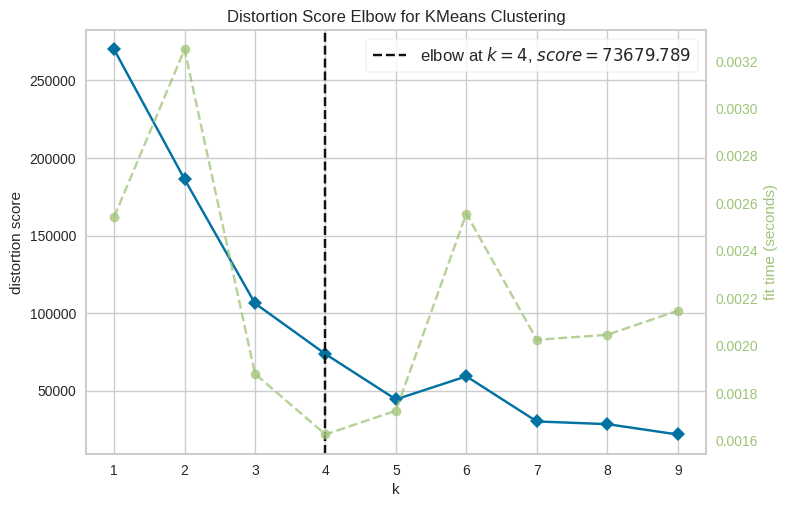

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1,10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan visualisasi
visualizer.show()




Hasil analisis metode elbow menunjukkan bahwa jumlah cluster optimal adalah 4 dengan nilai total within-cluster sum of squares (WCSS) sebesar 73,679.789. Ini berarti bahwa membagi data menjadi 4 cluster memberikan keseimbangan terbaik antara meminimalkan jarak di dalam cluster dan memaksimalkan jarak antar cluster

#Cluster Modeling ( K-Means Clustering )

In [39]:
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

kmeans.fit(X)

# Mendapatkan label cluster & Centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Mendapatkan jumlah cluster
k = 4

# Fungsi untuk analisis karakteristik cluster
def analyzer_cluster(X, label, k):
    print("Hasil analisis karakteristik cluster:")
    for i in range(k):
        cluster_data = X[label == i]


        mean_income = cluster_data[:, 0].mean()
        mean_spending = cluster_data[:, 1].mean()


        print(f"\nCluster {i+1}:")
        print(f"Rata-rata pendapatan: {mean_income}")
        print(f"Rata-rata skor pengeluaran: {mean_spending}")

analyzer_cluster(X, labels, k)


Hasil analisis karakteristik cluster:

Cluster 1:
Rata-rata pendapatan: 48.16831683168317
Rata-rata skor pengeluaran: 43.396039603960396

Cluster 2:
Rata-rata pendapatan: 86.53846153846153
Rata-rata skor pengeluaran: 82.12820512820512

Cluster 3:
Rata-rata pendapatan: 25.727272727272727
Rata-rata skor pengeluaran: 79.36363636363636

Cluster 4:
Rata-rata pendapatan: 87.0
Rata-rata skor pengeluaran: 18.63157894736842


melakukan visualisasi hasil clustering yang telah dilakukan dengan model KMeans serta menampilkan posisi centroid dari setiap cluster

##Visualisasikan

Nilai Centroid: 
Centroid 1: annual income = 48.17, spending score = 43.40
Centroid 2: annual income = 86.54, spending score = 82.13
Centroid 3: annual income = 25.73, spending score = 79.36
Centroid 4: annual income = 87.00, spending score = 18.63


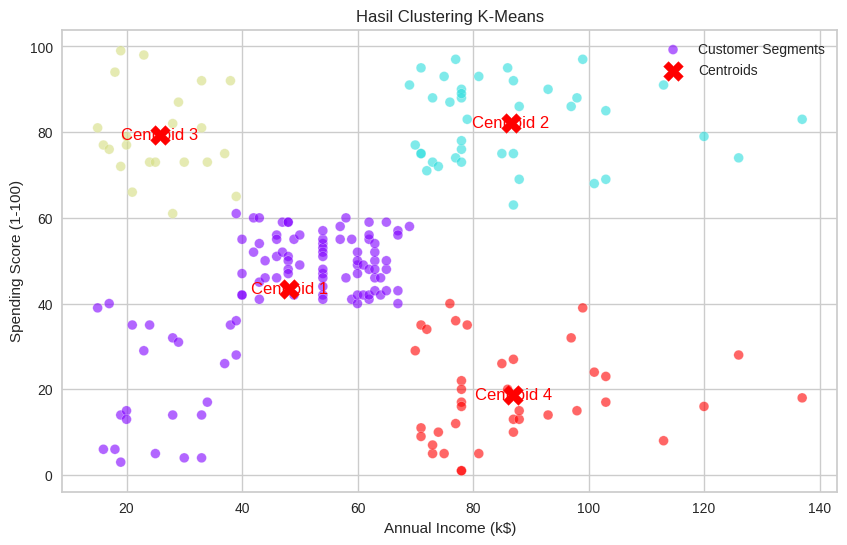

In [47]:
centroids = kmeans.cluster_centers_


plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:,1], c=labels, cmap='rainbow', s=50, alpha=0.6, edgecolors='w', marker='o', label='Customer Segments')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200,  marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='center', va='center', color='red')

plt.title('Hasil Clustering K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()


print("Nilai Centroid: ")

for i, centroids in enumerate(centroids):
    print(f'Centroid {i+1}: annual income = {centroids[0]:.2f}, spending score = {centroids[1]:.2f}')

plt.show()

Nilai centroid untuk setiap cluster sebagai berikut.

1. Centroid 1: pendapatan tahunan $48,260 serta skor belanja 56.48 menunjukkan pelanggan dengan pendapatan menengah dan belanja tinggi.

2. Centroid 2: pendapatan tahunan $86,540 serta skor belanja 82.13 menggambarkan pelanggan dengan pendapatan tinggi dan belanja intensif.

3. Centroid 3: pendapatan tahunan $26,300 serta skor belanja 79.8 menunjukkan pelanggan berpendapatan rendah dan berbelanja intensif.

4. Centroid 4: pendapatan tahunan $87,000 serta skor belanja 18.63 menunjukkan pelanggan berpendapatan tinggi dan berbelanja sedikit.

